In [12]:
import pandas as pd
import numpy as np  
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from  sklearn.gaussian_process.kernels import RBF,WhiteKernel,DotProduct,ConstantKernel,Matern,RationalQuadratic
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.model_selection import KFold
import random as t_random
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.model_selection import KFold
from scipy.interpolate import interp1d
import statsmodels.api as sm
import seaborn as sns

In [25]:
common = pd.read_csv('D:\\workspace\\ionstar_dataset\RT_benchmark2\\data_from_single_model\\testdata_Ax_By_1_4.txt',sep='\t')
# x
data_B = common['rt_y'].values
# y 
data_A = common['rt_x'].values
data_B = np.reshape(data_B, [common.shape[0], 1])
data_A = np.reshape(data_A, [common.shape[0], 1])



In [33]:
cv = ShuffleSplit(n_splits=3,  test_size= 0.6, random_state=0)
kernel =   DotProduct() 
#kernel = ConstantKernel(1.0, (1e-2, 1e6)) * RBF(length_scale=1, length_scale_bounds=(1e-5, 1e5)) + WhiteKernel(noise_level=5.2,noise_level_bounds=(1e-5, 1e2))
estimator=  GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=False, n_restarts_optimizer=1)

#estimator= linear_model.RidgeCV(alphas=np.power(  2, np.linspace(-130, 130)), scoring='explained_variance')
train_sizes, train_scores, test_scores = learning_curve( estimator,
                                    data_B, data_A,scoring='neg_mean_absolute_error',  cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 3))

print(train_scores.shape)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(12, 10) )
plt.xlabel("Training examples")
plt.ylabel("MEan Abs Error")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")


In [18]:
X_train, X_test, y_train, y_test = train_test_split( data_B, data_A, test_size=.40, random_state=42)
print (X_train.shape)
print (y_test.shape)

(5631, 1)
(3755, 1)


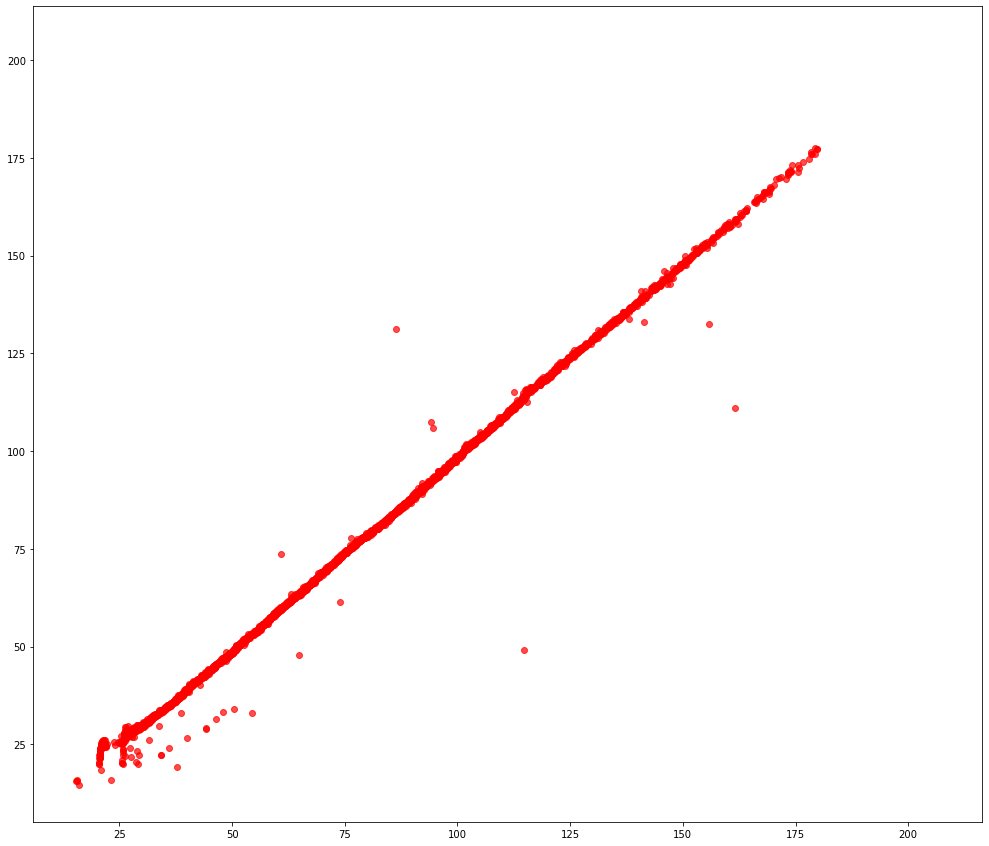

In [19]:
plt.figure(figsize=(17, 15) )

plt.scatter(X_train[X_train < 180],y_train[X_train < 180],alpha=0.7,color='red')
plt.scatter(X_train[X_train > 180],y_train[X_train > 180],alpha=0.,color='blue')

#plt.scatter(X_test,y_test,alpha=0.5,color='green')
#plt.scatter(X_test[X_test > 180],y_test[X_test > 180],alpha=0.5,color='green')

#plt.hist(y_train)


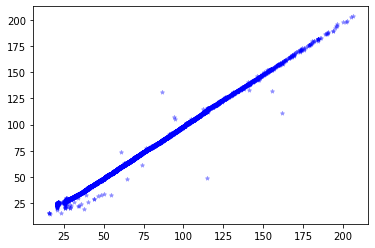

[ 10.472325  30.472325  50.472325  70.472325  90.472325 110.472325
 130.472325 150.472325 170.472325]
[ 288 1027 1387 1076  869  499  294  133   58]
0


C:\Users\a.argentini\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


model trained for bin 1 (288, 1)
  R2 score --> 0.7971085286816231
  mean abs error --> 0.7767370863515172


model trained for bin 2 (1027, 1)
  R2 score --> 0.9405198749595737
  mean abs error --> 0.34515181270535067


model trained for bin 3 (1387, 1)
  R2 score --> 0.9798812319215354
  mean abs error --> 0.19546041435280895


model trained for bin 4 (1076, 1)
  R2 score --> 0.9368967784364999
  mean abs error --> 0.2513030591168191


model trained for bin 5 (869, 1)
  R2 score --> 0.9854908711478482
  mean abs error --> 0.2360351769482143


model trained for bin 6 (499, 1)
  R2 score --> 0.7850026140345087
  mean abs error --> 0.4186444148808272


model trained for bin 7 (294, 1)
  R2 score --> 0.9882625114683941
  mean abs error --> 0.29641812367940584
model trained for bin 8 (133, 1)
  R2 score --> 0.5715906222010028
  mean abs error --> 1.1004969209898212


In [23]:
# weighted random split like it s implemented right now
#all_train = data_B[tt_x]
#all_train_y = data_A[tt_x]

# simple random split 
#all_train = X_train[tt_x]
#all_train_y = y_train[tt_x]


# simple random split 
all_train = X_train
all_train_y = y_train


plt.scatter(all_train,
                all_train_y,
                marker='*',c='blue',s=15,alpha=0.3) 
plt.show()
#bins_train = np.linspace(all_train.min() - 5 , all_train.max() -1,40)
bins_train = np.arange(all_train.min() - 5 , all_train.max() -20,20)
print (bins_train)
digitized_train = np.digitize(all_train, bins_train)
size_bin_train = np.array([  digitized_train[digitized_train == i].shape[0]  for i in range(1, len(bins_train)+1)])

#if np.where(size_bin_train < 10)[0]
print(size_bin_train)

print(np.where(size_bin_train < 10)[0].shape[0])

if np.where(size_bin_train < 10)[0] :
#print (np.where(size_bin_train < 10)[0][0])
    bins_train[np.where(size_bin_train < 10)[0][0]] =  all_train.max() + 1
    bins_train = bins_train[:np.where(size_bin_train < 10)[0][0] +1 ]
    digitized_train = np.digitize(all_train, bins_train)
    size_bin_train = np.array([  digitized_train[digitized_train == i].shape[0]  for i in range(1, len(bins_train))])
    print(size_bin_train)

model_lista= []
pred_mean= []
pred_var= []
for  ii in  range(1, len(bins_train)):
    #print (all_train[np.where(digitized_train == ii)[0]].shape  )
    #print (ii,'x min and max', all_train[np.where(digitized_train == ii)[0]].min(),all_train[np.where(digitized_train == ii)[0]].max() )
    #print (ii,'x centroid', all_train[np.where(digitized_train == ii)[0]].mean(), 'y_centroid',all_train_y[np.where(digitized_train == ii)[0]].mean())
    kernel = ConstantKernel(1.0, (1e-2, 1e6)) * RBF(length_scale=1, length_scale_bounds=(1e-5, 1e5)) + WhiteKernel(noise_level=5.2,noise_level_bounds=(1e-5, 1e2))
    #kernel = ConstantKernel(1.0, (1e-2, 1e6)) * Matern(length_scale=1, length_scale_bounds=(1e-5, 1e5),nu=2.5) + WhiteKernel(noise_level=5.2,noise_level_bounds=(1e-5, 6e2))
    #kernel= ConstantKernel(1.0, (1e-2, 1e6)) * RationalQuadratic(length_scale=1.0, alpha=0.1) + WhiteKernel(noise_level=5.2,noise_level_bounds=(1e-5, 6e2))
    #kernel = ConstantKernel(1.0, (1e-2, 1e2)) * DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-5,1e5)) + WhiteKernel(noise_level=5.2,noise_level_bounds=(1e-5, 6e2))
    m = GaussianProcessRegressor(kernel=kernel, alpha=0.5, normalize_y=False, n_restarts_optimizer=1).fit(all_train[np.where(digitized_train == ii)[0]],all_train_y[np.where(digitized_train == ii)[0]])
    ym_train_predicted, y_cov_train = m.predict(all_train[np.where(digitized_train == ii)[0]], return_std=True, return_cov=False)
    #np.sqrt(np.diag(y_cov_train)) 
    pred_mean.append( ym_train_predicted )
    pred_var.append(y_cov_train)
    print('model trained for bin',ii,all_train[np.where(digitized_train == ii)[0]].shape )
    #print (m)
    #print (m.kernel_)
    print ('  R2 score --> {}'.format(r2_score(all_train_y[np.where(digitized_train == ii)[0]], ym_train_predicted)))
    print ('  mean abs error --> {}'.format(mean_absolute_error(all_train_y[np.where(digitized_train == ii)[0]], ym_train_predicted)))

    model_lista.append(m)

model 1 -- train size: 2102  --/-->  cent_x : 29.50 cent_y : 29.03 rad_x : 24.99 cent_y : 29.67
   X min rt 15.564779999999999 --  max rt 40.558018:
   Y min rt 15.643579999999998 --  max rt 45.3182
model 2 -- train size: 3172  --/-->  cent_x : 56.29 cent_y : 56.37 rad_x : 29.99 cent_y : 39.63
   X min rt 40.569649 --  max rt 70.55553200000003:
   Y min rt 31.206114000000003 --  max rt 70.8340355


model 3 -- train size: 2581  --/-->  cent_x : 84.34 cent_y : 84.51 rad_x : 29.99 cent_y : 125.11
   X min rt 70.573097 --  max rt 100.56128:
   Y min rt 70.259074 --  max rt 195.36524
model 4 -- train size: 1412  --/-->  cent_x : 113.03 cent_y : 113.26 rad_x : 29.97 cent_y : 166.74
   X min rt 100.57139 --  max rt 130.54391:
   Y min rt 100.3408 --  max rt 267.08458
model 5 -- train size: 569  --/-->  cent_x : 143.23 cent_y : 143.22 rad_x : 29.98 cent_y : 32.49
   X min rt 130.56986 --  max rt 160.55095:
   Y min rt 130.31761 --  max rt 162.80307
model 6 -- train size: 115  --/-->  cent_x : 171.95 cent_y : 171.61 rad_x : 28.36 cent_y : 79.02


   X min rt 160.64004000000003 --  max rt 189.00341:
   Y min rt 119.59745 --  max rt 198.61903
model 7 -- train size: 29  --/-->  cent_x : 214.73 cent_y : 214.28 rad_x : 66.20 cent_y : 84.42
   X min rt 191.25083999999998 --  max rt 257.45376:
   Y min rt 172.47363 --  max rt 256.88899000000004


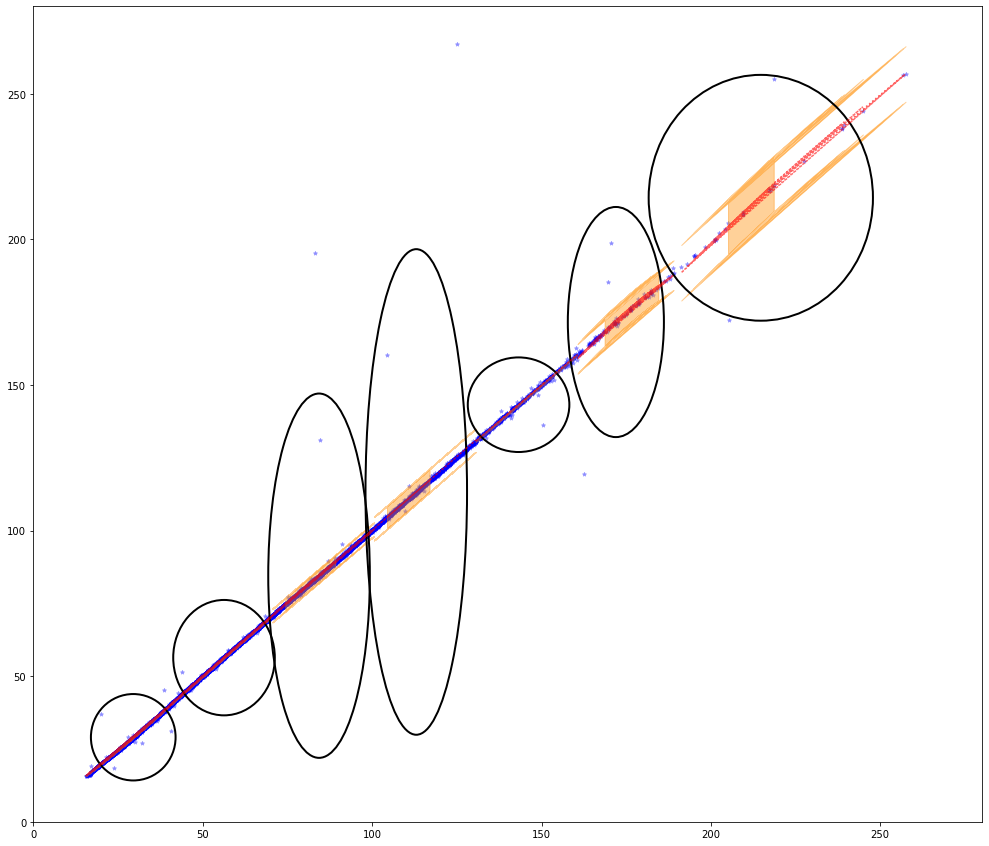

In [52]:
plt.figure(figsize=(17, 15) )
ax=plt.gca()
centroid_x_list= []
for  ii in  range(1, len(bins_train)):
    #print(pred_mean[ii-1].shape)
    centroid_x= all_train[np.where(digitized_train == ii)[0]].mean()
    centroid_x_list.append(centroid_x)
    centroid_y= all_train_y[np.where(digitized_train == ii)[0]].mean()
    radius_x= abs( all_train[np.where(digitized_train == ii)[0]].min() - all_train[np.where(digitized_train == ii)[0]].max())
    radius_y= abs( all_train_y[np.where(digitized_train == ii)[0]].min() - all_train_y[np.where(digitized_train == ii)[0]].max())
    print('model {} -- train size: {}  --/-->  cent_x : {:4.2f} cent_y : {:4.2f} rad_x : {:4.2f} cent_y : {:4.2f}'.format(ii, pred_mean[ii-1].shape[0],centroid_x, centroid_y,radius_x,radius_y) )
    print ('   X min rt {} --  max rt {}:'.format(all_train[np.where(digitized_train == ii)[0]].min() , all_train[np.where(digitized_train == ii)[0]].max()) )
    print ('   Y min rt {} --  max rt {}'.format(all_train_y[np.where(digitized_train == ii)[0]].min() , all_train_y[np.where(digitized_train == ii)[0]].max()) )

    #circle2 = plt.Circle((centroid_x, centroid_y), radius, color='grey', fill=False,alpha=0.4)
    
    e1 = patches.Ellipse((centroid_x, centroid_y), radius_x, radius_y, linewidth=2, fill=False, zorder=2)
    #plt.scatter(centroid_x,centroid_y,
    #            marker='+',c='green',s=150,alpha=0.9) 
    plt.scatter(all_train[np.where(digitized_train == ii)[0]],
               all_train_y[np.where(digitized_train == ii)[0]],
                marker='*',c='blue',s=15,alpha=0.3) 
    ax.add_patch(e1 )
    plt.plot(all_train[np.where(digitized_train == ii)[0]],pred_mean[ii-1],':r',alpha=0.6)
    #print ( all_train[np.where(digitized_train == ii)[0]][:,0].shape)
    plt.fill_between( all_train[np.where(digitized_train == ii)[0]][:,0], (pred_mean[ii-1] - pred_var[ii-1])[:,0], (pred_mean[ii-1]  +  pred_var[ii-1])[:,0], color='darkorange',
                      alpha=0.4)
    plt.ylim(0,280)
    plt.xlim(0,280)
#loewee + GP 
#plt.plot(all_train ,y_train_predicted_m_,'-g',alpha=0.4)
plt.show()
#plt.savefig('d:\localGP_training.png',dpi=300)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
#pairwise_distances( )
#dist = DistanceMetric.get_metric('euclidean')

#test_x= data_B[test]
#test_y = data_A[test]

test_x= X_test #[X_test >150]
test_y = y_test # [X_test >150]

cent_array= np.array(centroid_x_list)
#cent_array= cent_array.reshape([10,1])
#print (cent_array)
local_gp_error=[]
local_gp_predict=[]
for x_point,y_point in np.nditer([test_x,test_y]):
    d=  np.abs(cent_array - x_point) 
    #print (d)
    #print (( sorted(range(len(d)), key=lambda i: d[i],reverse=True )[-1:]))
    
    #avg= 0
    #print ('True_data ',x_test,y_test )
    for j in   ( sorted(range(len(d)), key=lambda i: d[i],reverse=True )[-1:]):
        
        test_m , test_cov = model_lista[j].predict(x_point.reshape(1,-1) ,return_std=False, return_cov=True) 
        #local_gp_error.append(mean_absolute_error(y_point.reshape(1,-1), test_m[0]))
        local_gp_predict.append(test_m[0])
        #np.sqrt(np.diag(test_cov))
        #avg += test_m[0]
        local_gp_error.append(mean_absolute_error(y_point.reshape(1,-1), test_m[0]))
        '''
        if x_point > 150:
             #print (sorted(range(len(d)), key=lambda i: d[i],reverse=True )[-3:])
             #print ('Local-GP model : {} pred: {} var : {} -- >  ABS ERROR: {} '.format(j, test_m[0],np.sqrt(np.diag(test_cov)),mean_absolute_error(np.array(y_point).reshape(-1,1), test_m[0])))  
             local_gp_error.append(mean_absolute_error(y_point.reshape(1,-1), test_m[0]))
        '''
print (np.mean(local_gp_error),len(local_gp_error))

0.18142087329173756 1109


C:\Users\a.argentini\Anaconda2\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


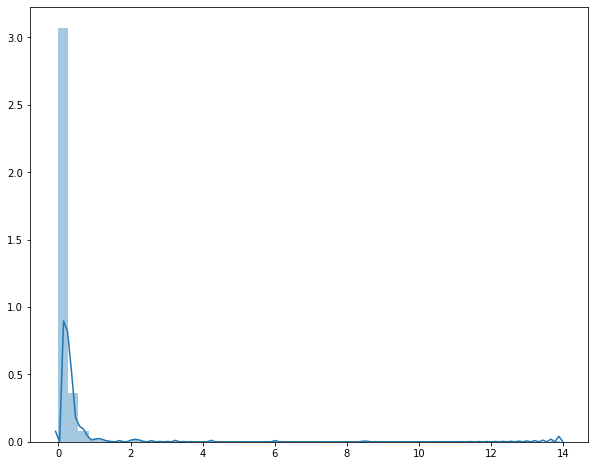

In [55]:

plt.figure(figsize=(10, 8) )
#print (max(local_gp_error))
sns.distplot(local_gp_error)

#plt.scatter(X_test,local_gp_error, marker='2',c='blue',s=15,alpha=0.7)
#plt.hlines(5,0,250)

#plt.ylim(0,max(local_gp_error)+5)
#plt.xlim(0,250)


(20, 250)

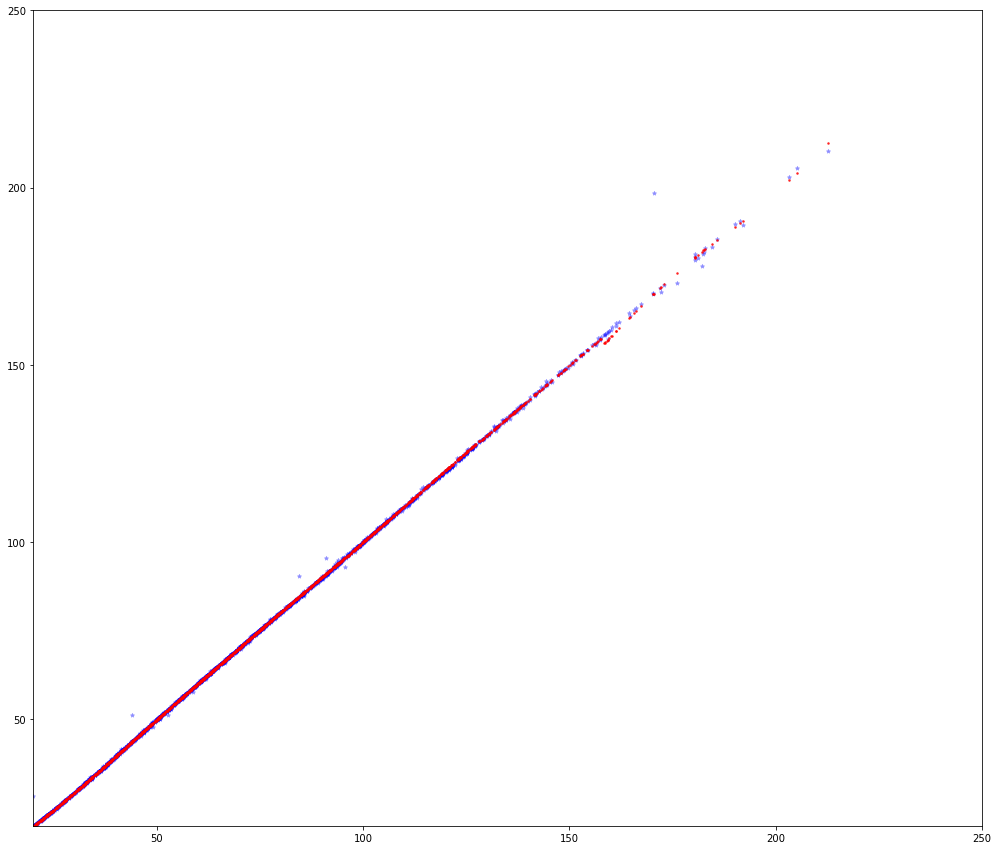

In [48]:
## PRediction GP-LoESS
#x_train

#lowess_gp_predict.append(test_m_[0])


plt.figure(figsize=(17, 15) )
plt.scatter(X_test,
                y_test,
                marker='*',c='blue',s=15,alpha=0.3)

plt.scatter(X_test,
               local_gp_predict,
                marker='.',c='red',s=10,alpha=0.7)

plt.xlim(20,250)
plt.ylim(20,250)

0.2240724912637458 0.2084557284393402


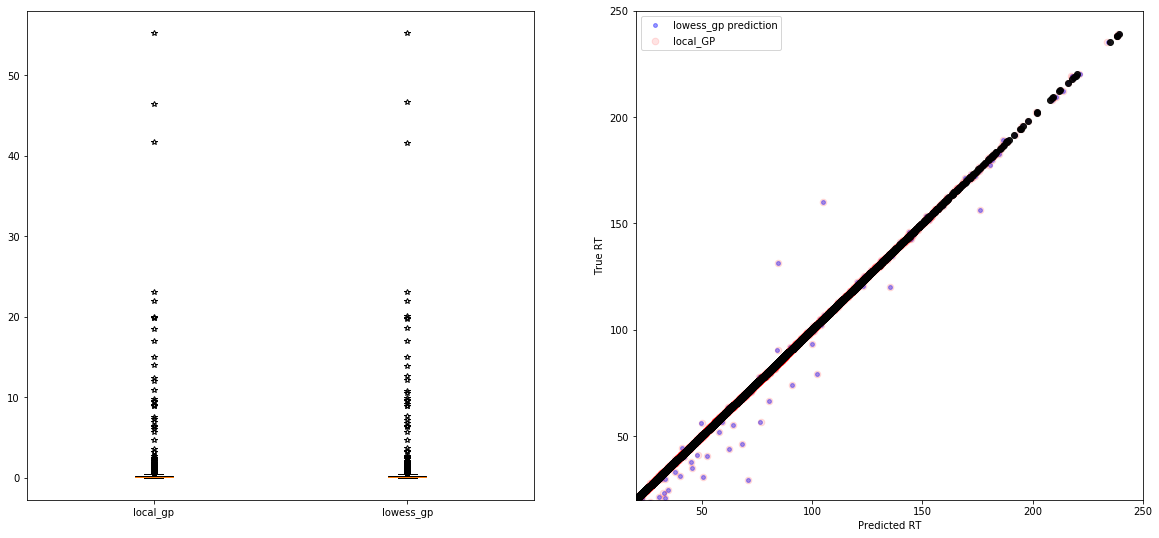